# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [2]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
print(mnist.target_names)

['class']


# **Jawaban Quiz**

In [6]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## **Nomor 1**

#### Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban Anda dan buktikan!

In [7]:
# Buat dataframe dari dictionary mnist, pada dataframe ini nama kolomnya menggunakan feature_names yaitu jumlah pixel keseluruhan dalam citra angka tersebut (terdapat 784 pixel dalam satu citra).
# kemudian isi data dari dataframe ini akan diisi dengan value dari key data pada dictionary mnist.
data = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)

# Setelah itu ditambahkan sebuah kolom baru dengan nama target dan isinya dari value keys target dictionary mnist yang akan menjadi target pada model kali ini.
data['target'] = mnist.target.astype(int)

# Tampilkan dataframe
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


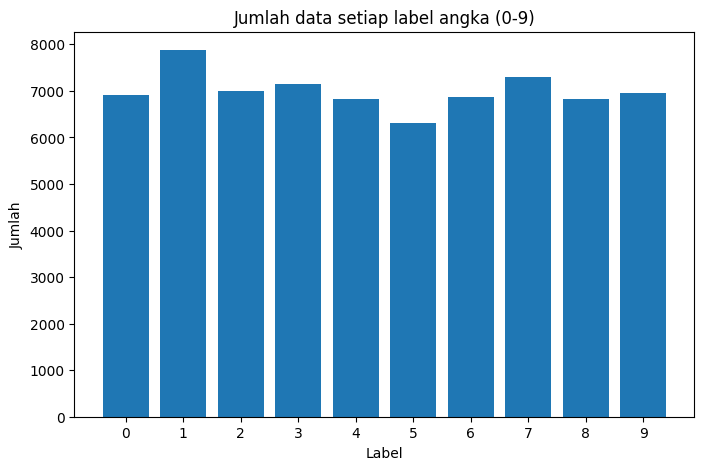

0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: target, dtype: int64


In [8]:
# Menghitung kemunculan tiap target (label angka dari 0 sampai 9) pada dataframe dan diurutkan berdasarkan indexnya.
label_counts = data['target'].value_counts().sort_index()

# Menampilkan hasil penghitungan setiap label dalam bentuk grafik bar menggunakan matplotlib
plt.figure(figsize=(8, 5))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Jumlah data setiap label angka (0-9)')
plt.xticks(label_counts.index)
plt.show()
print(label_counts)

Berdasarkan [sumber](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data), data imbalance merupakan sebuah keadaan ketika proporsi kelas, target atau label yang ada memiliki perbandingan tidak seimbang. Sehingga dalam sebuah dataset akan ada yang kelas/target/label yang mendominasi jumlahnya dan disebut sebagai kelas mayoritas. Sedangkan kelas/target/label yang lebih kecil disebut dengan kelas minoritas.

Cara menentukan apakah sebuah dataset merupakan data imbalance sangat relatif dengan kasus/model yang ingin dibuat. Contohnya meskipun terdapat proporsi kelas yang relatif kecil namun dalam sebuah dataset mengenai penyakit langka, maka dataset yang digunakan tidak terdapat data imbalance karena pada realitanya proporsi kelas tersebut kecil karena merupakan penyakit langka.

Cara lain adalah mencari distribusi data dataset tersebut, jika distribusinya normal, maka dataset dapat dikatakan memiliki minimum data imbalance. Salah satu parameter sebuah distribusi adalah distribusi normal adalah jika rata-rata dan mediannya sama.

In [9]:
# Mencari rata-rata dan median
mean = label_counts.mean()
median = label_counts.median()
print('Mean', mean)
print('Median', median)

# Persentase selisih
print((abs(median-mean)/mean)*100)

Mean 7000.0
Median 6930.5
0.9928571428571429


Berdasarkan hasil diatas, distribusi data mendekati normal dengan persentase kurang dari 1% selisihnya. Karena distribusi mendekati normal dan penerapan pada realita penulisan angka itu tidak merata, maka diambil kesimpulan **tidak terdapat data imbalance pada dataset yang digunakan.**

## **Nomor 2**
#### Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

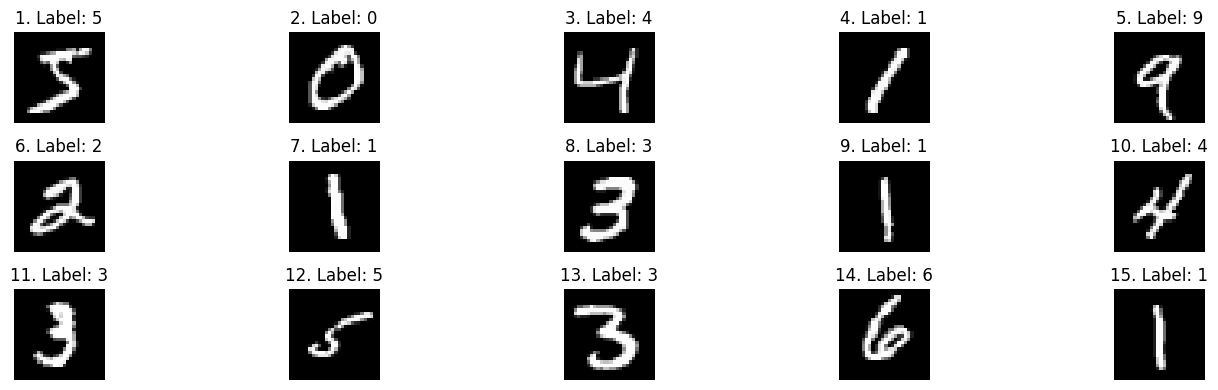

In [10]:
# Tampilkan citra dalam ukuran 28x28 piksel
images = mnist.data.to_numpy().reshape(-1, 28, 28)
# Simpan label ke dalam variabel labels
labels = mnist.target.astype(int)

# Tampilkan 15 citra
plt.figure(figsize=(15, 4))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray') # Tampilkan citra dengan color map grayscale
    plt.title(f"{i+1}. Label: {labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Nomor 3**

#### Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
  ##### - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
  ##### - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

#### Pada langkah ini, saya menggunakan metode ekstraksi fitur dengan PCA dengan jumlah component sebanyak 75. Proses ekstraksi ini akan mengidentifikasi fitur yang menjadi prioritas atau fitur paling penting dalam sebuah dataset.

In [11]:
# Slice kolom fitur dengan kolom target
X = data.drop('target', axis=1)
# Ubah tipe data menjadi integer
X = X.astype(int)

# Lakukan ekstraksi PCA
pca = PCA(n_components=75)
pc = pca.fit_transform(X)

# Susun kembali menjadi dataframe
pc_data = pd.DataFrame(data=pc, columns=[f'Pixel{i+1}' for i in range(75)])

## **Nomor 4**
#### Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [12]:
X = pc_data
y = data.iloc[:, 784]

# 70 : 30

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=911)

# 80 : 20

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=911)

# 90 : 10
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=911)

## **Nomor 5**
#### Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.

##### - Anda diperbolehkan untuk melakukan tunning parameter.
##### - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

### Naive Bayes

Saya menggunakan Gaussian Naive Bayes karena dataset yang ada cocok dengan metode tersebut. Metode ini biasanya digunakan ketika fitur-fitur dalam dataset terdistribusi secara normal sehingga cocok untuk dataset ini. Sedangkan Multinomial Naive Bayes cocok untuk klasifikasi teks dengan proses perhitungan, hal tersebut kurang cocok dengan dataset dan tujuan yang ingin dicapai. Selain itu, Naive Bayes Bernoulli yang merupakan metode lain juga kurang cocok karena metode Naive Bayes Bernoulli cocok ketika fiturnya bernilai biner (mencirikan keberadaan antara ada atau tidaknya fitur tersebut).

In [13]:
# Naive Bayes dengan data training dibanding data testing 70:30
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Naive Bayes dengan data training dibanding data testing 80:20
gnb2 = GaussianNB()
gnb2.fit(X_train2, y_train2)

# Naive Bayes dengan data training dibanding data testing 90:10
gnb3 = GaussianNB()
gnb3.fit(X_train3, y_train3)

GaussianNB()

### SVM

In [14]:
# Fitting SVM 70:30
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

# Fitting SVM 80:20
svc2 = SVC(kernel='rbf')
svc2.fit(X_train2, y_train2)

# Fitting SVM 90:10
svc3 = SVC(kernel='rbf')
svc3.fit(X_train3, y_train3)

SVC()

## **Nomor 6**
#### Evaluasi model yang Anda buat terhadap data training dan data testing.

##### - Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
##### - Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
##### - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

### Naive Bayes

#### Metric Accuracy

In [15]:
# Metric Accuracy
# 70 : 30

# Prediksi dengan data training
y_train_pred = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# 80 : 20

# Prediksi dengan data training
y_train_pred2 = gnb2.predict(X_train2)

# Evaluasi akurasi training
acc_train2 = accuracy_score(y_train2, y_train_pred2)

# Prediksi test data
gnb_y_test_pred2 = gnb2.predict(X_test2)

# Evaluasi model dengan metric akurasi
acc_test2 = accuracy_score(y_test2, gnb_y_test_pred2)

# 90 : 10

# Prediksi dengan data training
y_train_pred3 = gnb3.predict(X_train3)

# Evaluasi akurasi training
acc_train3 = accuracy_score(y_train3, y_train_pred3)

# Prediksi test data
y_test_pred3 = gnb3.predict(X_test3)

# Evaluasi model dengan metric akurasi
acc_test3 = accuracy_score(y_test3, y_test_pred3)

# Print hasil evaluasi metric akurasi 70:30
print(f'Hasil akurasi data train 70:30 : {acc_train}')
print(f'Hasil akurasi data test 70:30 : {acc_test}')
# Print hasil evaluasi metric akurasi 80:20
print(f'\nHasil akurasi data train 80:20 : {acc_train2}')
print(f'Hasil akurasi data test 80:20 : {acc_test2}')
# Print hasil evaluasi metric akurasi 90:10
print(f'\nHasil akurasi data train 90:10 : {acc_train3}')
print(f'Hasil akurasi data test 90:10 : {acc_test3}')


Hasil akurasi data train 70:30 : 0.8745714285714286
Hasil akurasi data test 70:30 : 0.8752380952380953

Hasil akurasi data train 80:20 : 0.8748035714285715
Hasil akurasi data test 80:20 : 0.8748571428571429

Hasil akurasi data train 90:10 : 0.8748095238095238
Hasil akurasi data test 90:10 : 0.8697142857142857


#### Classification Report

In [16]:
# Print hasil classification Report 70:30
print(f'Hasil akurasi data train 70:30 : {classification_report(y_test, y_test_pred)}')
# Print hasil classification Report 80:20
print(f'\nHasil akurasi data train 80:20 : {classification_report(y_test2, gnb_y_test_pred2)}')
# Print hasil classification Report 90:10
print(f'\nHasil akurasi data train 90:10 : {classification_report(y_test3, y_test_pred3)}')

Hasil akurasi data train 70:30 :               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1998
           1       0.98      0.94      0.96      2380
           2       0.79      0.87      0.82      2131
           3       0.84      0.83      0.83      2179
           4       0.88      0.85      0.87      2094
           5       0.78      0.85      0.81      1792
           6       0.94      0.92      0.93      2116
           7       0.93      0.86      0.90      2173
           8       0.83      0.85      0.84      2041
           9       0.83      0.84      0.83      2096

    accuracy                           0.88     21000
   macro avg       0.88      0.87      0.87     21000
weighted avg       0.88      0.88      0.88     21000


Hasil akurasi data train 80:20 :               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1320
           1       0.98      0.94      0.96      1599
           

#### Confusion Matrix

Text(113.9222222222222, 0.5, 'predicted label')

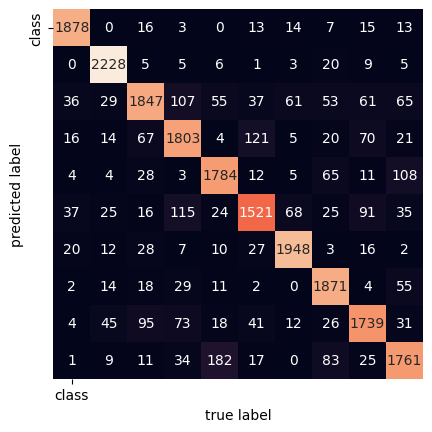

In [17]:
# 70 : 30
mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(113.9222222222222, 0.5, 'predicted label')

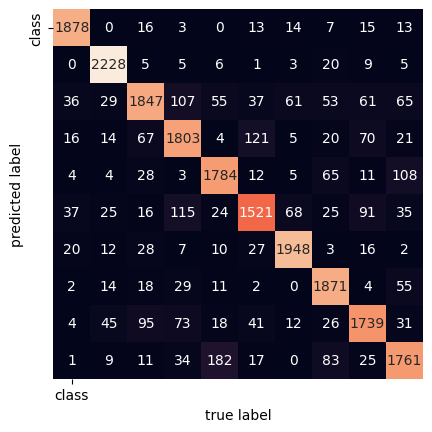

In [18]:
# 80 : 20
mat2 = confusion_matrix(y_test2, gnb_y_test_pred2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(113.9222222222222, 0.5, 'predicted label')

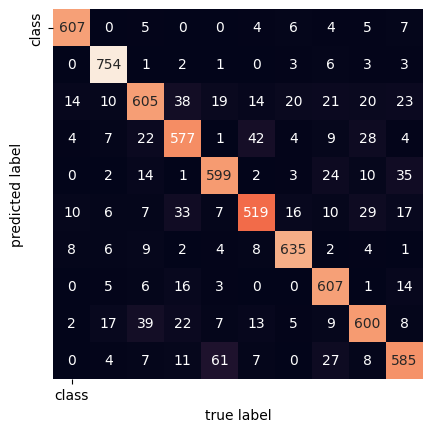

In [19]:
# 90 : 10
mat = confusion_matrix(y_test3, y_test_pred3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

### SVM

#### Metric Accuracy

In [ ]:
# Metric Accuracy
# 70 : 30

# Prediksi dengan data training
y_train_pred = svc.predict(X_train)

# Evaluasi akurasi training
svc_acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = svc.predict(X_test)

# Evaluasi model dengan metric akurasi
svc_acc_test = accuracy_score(y_test, y_test_pred)

# 80 : 20

# Prediksi dengan data training
y_train_pred2 = svc2.predict(X_train2)

# Evaluasi akurasi training
svc_acc_train2 = accuracy_score(y_train2, y_train_pred2)

# Prediksi test data
y_test_pred2 = svc2.predict(X_test2)

# Evaluasi model dengan metric akurasi
svc_acc_test2 = accuracy_score(y_test2, y_test_pred2)

# 90 : 10

# Prediksi dengan data training
y_train_pred3 = svc3.predict(X_train3)

# Evaluasi akurasi training
svc_acc_train3 = accuracy_score(y_train3, y_train_pred3)

# Prediksi test data
y_test_pred3 = svc3.predict(X_test3)

# Evaluasi model dengan metric akurasi
svc_acc_test3 = accuracy_score(y_test3, y_test_pred3)

# Print hasil evaluasi metric akurasi 70:30
print(f'Hasil akurasi data train 70:30 : {svc_acc_train}')
print(f'Hasil akurasi data test 70:30 : {svc_acc_test}')
# Print hasil evaluasi metric akurasi 80:20
print(f'\nHasil akurasi data train 80:20 : {svc_acc_train2}')
print(f'Hasil akurasi data test 80:20 : {svc_acc_test2}')
# Print hasil evaluasi metric akurasi 90:10
print(f'\nHasil akurasi data train 90:10 : {svc_acc_train3}')
print(f'Hasil akurasi data test 90:10 : {svc_acc_test3}')

#### Classification Report

In [ ]:
# Print hasil classification Report 70:30
print(f'Hasil akurasi data train 70:30 : {classification_report(y_test, y_test_pred)}')
# Print hasil classification Report 80:20
print(f'\nHasil akurasi data train 80:20 : {classification_report(y_test2, y_test_pred2)}')
# Print hasil classification Report 90:10
print(f'\nHasil akurasi data train 90:10 : {classification_report(y_test3, y_test_pred3)}')

#### Confusion Matrix

In [ ]:
# 70 : 30
mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
# 80 : 20
mat = confusion_matrix(y_test2, y_test_pred2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
# 90 : 10
mat = confusion_matrix(y_test3, y_test_pred3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## **Nomor 7**
#### Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

In [ ]:
plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test2[i].reshape(28, 28), cmap=gray)
    plt.title(f"Prediksi: {gnb_y_test_pred2[i]}\nAktual: {y_test2[i]}")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test2[i].reshape(28, 28), cmap=gray)
    plt.title(f"Prediksi: {y_test_pred2[i]}\nAktual: {y_test2[i]}")
plt.show()

## **Nomor 8**
#### Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

Berdasarkan langkah-langkah yang telah dilakukan, model terbaik yang didapat adalah melalui metode SVC dengan konfigurasi kernel rbf dan menggunakan ekstraksi fitur PCA. Tingkat akurasi yang didapat adalah 0.99, namun terdapat kelemahan yaitu proses keseluruhan metode SVC lebih lambat dibandingkan dengan metode Naive Bayes.